In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, Fullscreen
import matplotlib.pyplot as plt

In [2]:

# Load the CSV file into a DataFrame
# Cargar el archivo CSV en un DataFrame
url = "https://www.santacruzdetenerife.es/opendata/dataset/7850581f-371b-4307-a635-3a8c2802a964/resource/85a5fcec-26c4-40c4-9ded-47bf999c6c5a/download/arboles_singulares.csv"
df = pd.read_csv(url, encoding='latin-1')

# Data exploration
# Exploración de datos
#print(df.head())  # Display the first 5 rows
# Mostrar las primeras 5 filas
print(df.info())  # Get information about the dataframe
# Obtener información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        63 non-null     float64
 1   GEOCODIGO  63 non-null     object 
 2   GENERO     63 non-null     object 
 3   ESPECIE    63 non-null     object 
 4   NOM_COMUN  63 non-null     object 
 5   FAMILIA    63 non-null     object 
 6   ORIGEN     63 non-null     object 
 7   ENLACE     63 non-null     object 
 8   UTM_X      63 non-null     float64
 9   UTM_Y      63 non-null     float64
 10  GRAD_X     63 non-null     float64
 11  GRAD_Y     63 non-null     float64
dtypes: float64(5), object(7)
memory usage: 6.0+ KB
None


In [3]:
print(df.describe())  # Descriptive statistics for numerical columns
# Estadísticas descriptivas para columnas numéricas

             FID          UTM_X         UTM_Y     GRAD_X     GRAD_Y
count  63.000000      63.000000  6.300000e+01  63.000000  63.000000
mean   31.000000  376868.211314  3.149393e+06 -16.257713  28.465308
std    18.330303    1366.372702  9.956146e+02   0.013886   0.009066
min     0.000000  370087.140000  3.144783e+06 -16.326579  28.423053
25%    15.500000  376850.725000  3.149231e+06 -16.257917  28.463802
50%    31.000000  377158.610000  3.149644e+06 -16.254781  28.467616
75%    46.500000  377438.865000  3.150094e+06 -16.251946  28.471650
max    62.000000  378926.200000  3.151765e+06 -16.236946  28.486906


In [4]:
print(df['FAMILIA'].value_counts())  # Count occurrences of each family
# Contar las ocurrencias de cada familia

FAMILIA
Moraceae          17
Malvaceae          7
Fabaceae           7
Arecaceae          7
Bignoniaceae       5
Euphorbiaceae      4
Asparagaceae       3
Meliaceae          2
Combretaceae       2
Casuarinaceae      1
Urticaceae         1
Salicaceae         1
Myrtaceae          1
Anacardiaceae      1
Sapindaceae        1
Phytolaccaceae     1
Podocarpaceae      1
Rhizophoraceae     1
Name: count, dtype: int64


In [5]:
# Create a folium map centered around Santa Cruz de Tenerife
# Crear un mapa con Folium centrado en Santa Cruz de Tenerife
map_center = [28.4636, -16.2518]  # Approximate coordinates for Santa Cruz de Tenerife
# Coordenadas aproximadas para Santa Cruz de Tenerife
m = folium.Map(location=map_center, zoom_start=12, scrollWheelZoom=False)

# Create a marker cluster to avoid overlapping markers
#marker_cluster = MarkerCluster().add_to(m)
# Adjust the cluster distance (higher value reduces clustering, default is 40)
marker_cluster = MarkerCluster(
    options={'spiderfyOnMaxZoom': False, 'showCoverageOnHover': False, 'zoomToBoundsOnClick': True, 'disableClusteringAtZoom': 16, 'maxClusterRadius': 20}
).add_to(m)

# Function to assign colors to families
# Función para asignar colores a las familias
def assign_color(family):
    colors = {
        'Fagaceae': 'blue',  # Add more families and colors here as needed
        # Añadir más familias y colores aquí según sea necesario
        'Myrtaceae': 'green',
        'Moraceae': 'red',
        'Fabaceae': 'purple',
    }
    return colors.get(family, 'brown')  # Default color is brown if family not found
    # El color por defecto es gris si no se encuentra la familia

# Loop through the DataFrame and add markers
# Recorrer el DataFrame y agregar marcadores
for _, row in df.iterrows():
    # Extract the coordinates
    # Extraer las coordenadas
    lat, lon = row['GRAD_Y'], row['GRAD_X']

    # Tooltip text with Geocodigo and Nom_comun
    # Texto del tooltip con Geocódigo y Nombre común
    tooltip_text = f"Geocodigo: {row['GEOCODIGO']}<br>Nombre común: {row['NOM_COMUN']}"

    # Create a marker with tooltip and color based on Familia
    # Crear un marcador con tooltip y color basado en la Familia
    folium.CircleMarker(
        location=[lat, lon],
        radius=10,
        color=assign_color(row['FAMILIA']),
        fill=True,
        fill_color=assign_color(row['FAMILIA']),
        fill_opacity=0.7,
        tooltip=tooltip_text
    ).add_to(marker_cluster)

# Display the map
# Mostrar el mapa
m.save('singular_trees_map.html')
# Guardar el mapa como 'singular_trees_map.html'
print("Map saved as 'singular_trees_map.html'.")
# Mapa guardado como 'singular_trees_map.html'


Map saved as 'singular_trees_map.html'.


In [6]:
m

In [ ]:
#Chart below

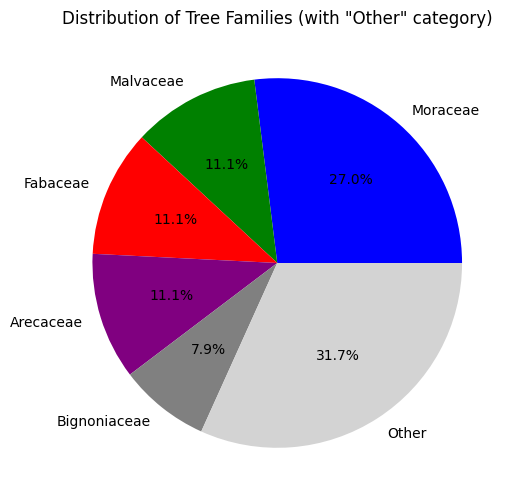

In [ ]:
# Goal: Display pie chart of tree families
# Objetivo: Mostrar gráfico de pastel de las familias de árboles

# Count the occurrences of each family
family_counts = df['FAMILIA'].value_counts()

# Calculate the total number of trees
total_trees = family_counts.sum()

# Function to group small categories
# Función para agrupar categorías pequeñas
def group_small_categories(counts, threshold):
    # Categories below the threshold are grouped into "Other"
    # Las categorías por debajo del umbral se agrupan en "Otros"
    other_count = counts[counts / total_trees < threshold].sum()

    # Keep the large categories and add the "Other" category using pd.concat
    # Mantener las categorías grandes y agregar la categoría "Otros" usando pd.concat
    filtered_counts = pd.concat([counts[counts / total_trees >= threshold], pd.Series(other_count, index=['Other'])])

    return filtered_counts

# Group categories that represent less than 7% of the total
# Agrupar las categorías que representan menos del 7% del total
threshold = 0.07
family_counts_grouped = group_small_categories(family_counts, threshold)

# Create the pie chart with grouped categories
# Crear el gráfico de pastel con las categorías agrupadas
plt.figure(figsize=(10, 6))
family_counts_grouped.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'gray', 'lightgray'])
plt.ylabel('')
plt.title('Distribution of Tree Families (with "Other" category)')
# Título: Distribución de las Familias de Árboles (con categoría "Otros")
plt.show()


Explanation of the Code:
Data Loading and Exploration:

The CSV file is read from the URL using pandas.read_csv().
df.head() and df.info() provide an initial view and information about the data.
df.describe() gives descriptive statistics, and df['Familia'].value_counts() counts the occurrences of different tree families.
Map Creation with Folium:

A folium.Map is created with a center point set to Santa Cruz de Tenerife’s coordinates.
A MarkerCluster is added to handle cases where many markers overlap.
A function assign_color() assigns specific colors based on the "Familia" field. You can add more families and colors as needed.
Markers are created using folium.CircleMarker() and tooltips showing "Geocodigo" and "Nom_comun" are added to each marker.
Visualization:

The map is saved to an HTML file (singular_trees_map.html), which you can open in a browser.
A pie chart is optionally generated to visualize the distribution of different tree families.